In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 
import statsmodels.formula.api as sf

### Explore Data
Попробовать самостоятельно найти датасет titanic, загрузить его

In [19]:
df = sns.load_dataset('titanic')

### Logistic regression

In [55]:
# определяем значимость влияния класса пассажира и его пола на веростность выживаемости
model = sf.glm('survived ~ C(pclass) + C(sex) + C(pclass)*C(sex)', df, family = sm.families.Binomial()).fit()

In [56]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -399.05
Date:                Fri, 05 Nov 2021   Deviance:                       798.10
Time:                        13:52:59   Pearson chi2:                     891.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

log of chances -> propability
![logit func](https://upload.wikimedia.org/wikipedia/commons/c/c8/Logit.svg)

In [24]:
import math as m

def activasion(x):
    return m.log(x/(1-x), m.e)

def activasion_back(x):
    return 1/(1+m.e**(-x))

In [58]:
activasion_back(model.params[0])

0.9680851063829116

In [57]:
df.query('pclass == 1 and sex == "female"').survived.mean()

0.9680851063829787

### Linear regression

Lets look at contibutors to the fare price with linear regression

In [159]:
model_2 = sf.ols('fare ~ C(pclass) + age + C(embark_town) + C(parch)', df).fit()

In [160]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     48.48
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           1.06e-78
Time:                        19:44:33   Log-Likelihood:                -3634.2
No. Observations:                 712   AIC:                             7292.
Df Residuals:                     700   BIC:                             7347.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**Contributors to fare**:
1. pclass: strong + precise
2. parch: medium + imprecise
3. embarked town: small + kind of precise  
    Southampton
    
**next step**:  
1. накинуть какой импакт дает предиктор, если его сдвинуть адекватно бизнес реалиям (вывести влияние на зависимую переменную от примерно равного по сложности реализации сдвига каждого из предикторов)  
2. приоретизировать важность предикторов по этому влиянию

### Tips & Tricks

#### propability doesnt equal in regression and in data

This can be possible due to not including significant interactions between two factors
Without interaction model just sum up bias of each factor (bias determinated om all other data), and dont consider that interactions of two factor can change it bias (has its own bias)

In [24]:
# определяем значимость влияния класса пассажира и его пола на веростность выживаемости
model = sf.ols('fare ~ C(pclass) + C(sex)', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     171.8
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           8.28e-88
Time:                        18:10:13   Log-Likelihood:                -4539.8
No. Observations:                 891   AIC:                             9088.
Df Residuals:                     887   BIC:                             9107.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         91.2804      3.124     29.

intercept - females in the first class

In [48]:
intercept = model.params[0]
activasion_back(intercept)

0.9086385042622006

In [47]:
df.query('pclass == 1 and sex == "female"').survived.mean()

0.9680851063829787

the results are not equal due to lack of interactions factor  
lets add it

In [49]:
print(sf.glm('survived ~ C(pclass) + C(sex) + C(pclass)*C(sex)', df, family = sm.families.Binomial()).fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -399.05
Date:                Fri, 05 Nov 2021   Deviance:                       798.10
Time:                        13:51:14   Pearson chi2:                     891.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [51]:
activasion_back(3.4122)

0.9680836474923478

#### Normalisation & Standartisation

Возможно рабочий вариант сразу выводить коэффициенты модели, интепретируемые в значимость эффекта, в его размер более менее который можно сопоставлять

У богдана в курсе было, ну а вообще там тупо одна формула к данным применить и все

Или в либах:
    Sklearn: MinMaxScaler, StandartScaler

про необходимость data scaling и основные подходы: https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e  

#### 

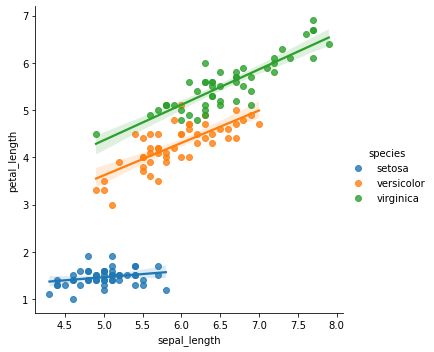

In [27]:
g = sns.lmplot(data=df, x = 'sepal_length', y = 'petal_length', hue = 'species')

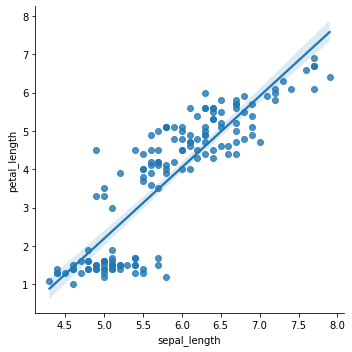

In [28]:
g = sns.lmplot(data=df, x = 'sepal_length', y = 'petal_length')

In [25]:
df = sns.load_dataset('iris')

model = sf.ols('petal_length ~ sepal_length', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sat, 06 Nov 2021   Prob (F-statistic):           1.04e-47
Time:                        18:10:29   Log-Likelihood:                -190.57
No. Observations:                 150   AIC:                             385.1
Df Residuals:                     148   BIC:                             391.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.1014      0.507    -14.016   

In [26]:
df = sns.load_dataset('iris')

model = sf.ols('petal_length ~ sepal_length + C(species)', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          1.46e-116
Time:                        18:11:09   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [29]:
df = sns.load_dataset('iris')

model = sf.ols('petal_length ~ sepal_length + C(species) + sepal_length*C(species)', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           petal_length   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1333.
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          1.19e-118
Time:                        18:14:25   Log-Likelihood:                -8.3584
No. Observations:                 150   AIC:                             28.72
Df Residuals:                     144   BIC:                             46.78
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [8]:
a = (
    1 
    == 
    1
)